https://seoyeonc.github.io/chch/cnn/feature%20extraction/big%20data%20analysis/2022/01/11/bd_9주차.html

https://seoyeonc.github.io/chch/cam/2022/01/10/bd-8주차_1.html

# import

In [1]:
import torch 
from fastai.vision.all import *
import cv2
import numpy as np
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageFile
from PIL import Image
ImageFile.LOAD_TRUNCATED_IMAGES = True
from torchvision.utils import save_image
import os

In [2]:
import rpy2
import rpy2.robjects as ro 
from rpy2.robjects.vectors import FloatVector 
from rpy2.robjects.packages import importr

In [3]:
def label_func(f):
    if f[0].isupper():
        return 'cat' 
    else: 
        return 'dog' 

# 학습

In [4]:
path_r=Path('random_pet_one')   #랜덤박스넣은사진

In [5]:
files=get_image_files(path_r)

In [6]:
dls_r=ImageDataLoaders.from_name_func(path_r,files,label_func,item_tfms=Resize(512)) 

In [7]:
lrnr_r1=cnn_learner(dls_r,resnet34,metrics=error_rate)
lrnr_r1.fine_tune(1)

/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
net_1=lrnr_r1.model[0]
net_2=lrnr_r1.model[1] 

In [9]:
net_2 = torch.nn.Sequential(
    torch.nn.AdaptiveAvgPool2d(output_size=1), 
    torch.nn.Flatten(),
    torch.nn.Linear(512,out_features=2,bias=False))

In [10]:
net_r=torch.nn.Sequential(net_1,net_2)

In [11]:
lrnr_r2=Learner(dls_r,net_r,metrics=accuracy) 

In [12]:
lrnr_r2.fine_tune(10) 

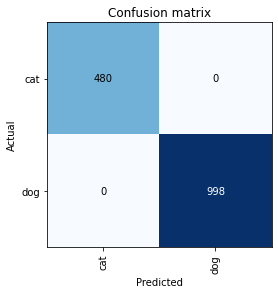

In [13]:
interp = ClassificationInterpretation.from_learner(lrnr_r2)
interp.plot_confusion_matrix()

In [70]:
x, = first(dls_r.test_dl([PILImage.create(get_image_files(path_r)[2])]))

In [71]:
camimg = torch.einsum('ij,jkl -> ikl', net_2[2].weight, net_1(x).squeeze())

In [73]:
# # 서연 수정 code
# fig, (ax1,ax2) = plt.subplots(1,2) 
# # 
# dls_r.train.decode((x,))[0].squeeze().show(ax=ax1)
# ax1.imshow(camimg[0].to("cpu").detach(),alpha=0.7,extent=(0,511,511,0),interpolation='spline36',cmap='bone')
# #
# dls_r.train.decode((x,))[0].squeeze().show(ax=ax2)
# ax2.imshow(camimg[1].to("cpu").detach(),alpha=0.7,extent=(0,511,511,0),interpolation='spline36',cmap='bone')
# fig.set_figwidth(8)            
# fig.set_figheight(8)
# fig.tight_layout()

In [68]:
# fig, ax = plt.subplots(5,5) 
# k=0 
# for i in range(5):
#     for j in range(5): 
#         x, = first(dls_r.test_dl([PILImage.create(get_image_files(path_r)[k])]))
#         camimg = torch.einsum('ij,jkl -> ikl', net_2[2].weight, net_1(x).squeeze())
#         a,b = net_r(x).tolist()[0]
#         catprob, dogprob = np.exp(a)/ (np.exp(a)+np.exp(b)) ,  np.exp(b)/ (np.exp(a)+np.exp(b)) 
#         if catprob>dogprob: 
#             dls_r.train.decode((x,))[0].squeeze().show(ax=ax[i][j])
#             ax[i][j].imshow(camimg[0].to("cpu").detach(),alpha=0.7,extent=(0,512,512,0),interpolation='bilinear',cmap='bone')
#             ax[i][j].set_title("cat(%s)" % catprob.round(5))
#         else: 
#             dls_r.train.decode((x,))[0].squeeze().show(ax=ax[i][j])
#             ax[i][j].imshow(camimg[1].to("cpu").detach(),alpha=0.7,extent=(0,512,512,0),interpolation='bilinear',cmap='bone')
#             ax[i][j].set_title("dog(%s)" % dogprob.round(5))
#         k=k+1 
# fig.set_figwidth(16)            
# fig.set_figheight(16)
# fig.tight_layout()

## thresholding point

<ipython-input-69-98bb7127f6af>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  power_threshed=np.array(ebayesthresh(FloatVector(torch.tensor(camimg[0].detach().reshape(-1))**2)))
<ipython-input-69-98bb7127f6af>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ybar_threshed = np.where(power_threshed>2000,torch.tensor(camimg[0].detach().reshape(-1)),0)
<ipython-input-69-98bb7127f6af>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  power_threshed2=np.array(ebayesthresh(FloatVector(torch.tensor(camimg[1].detach().reshape(-1))**2)))
<ipy

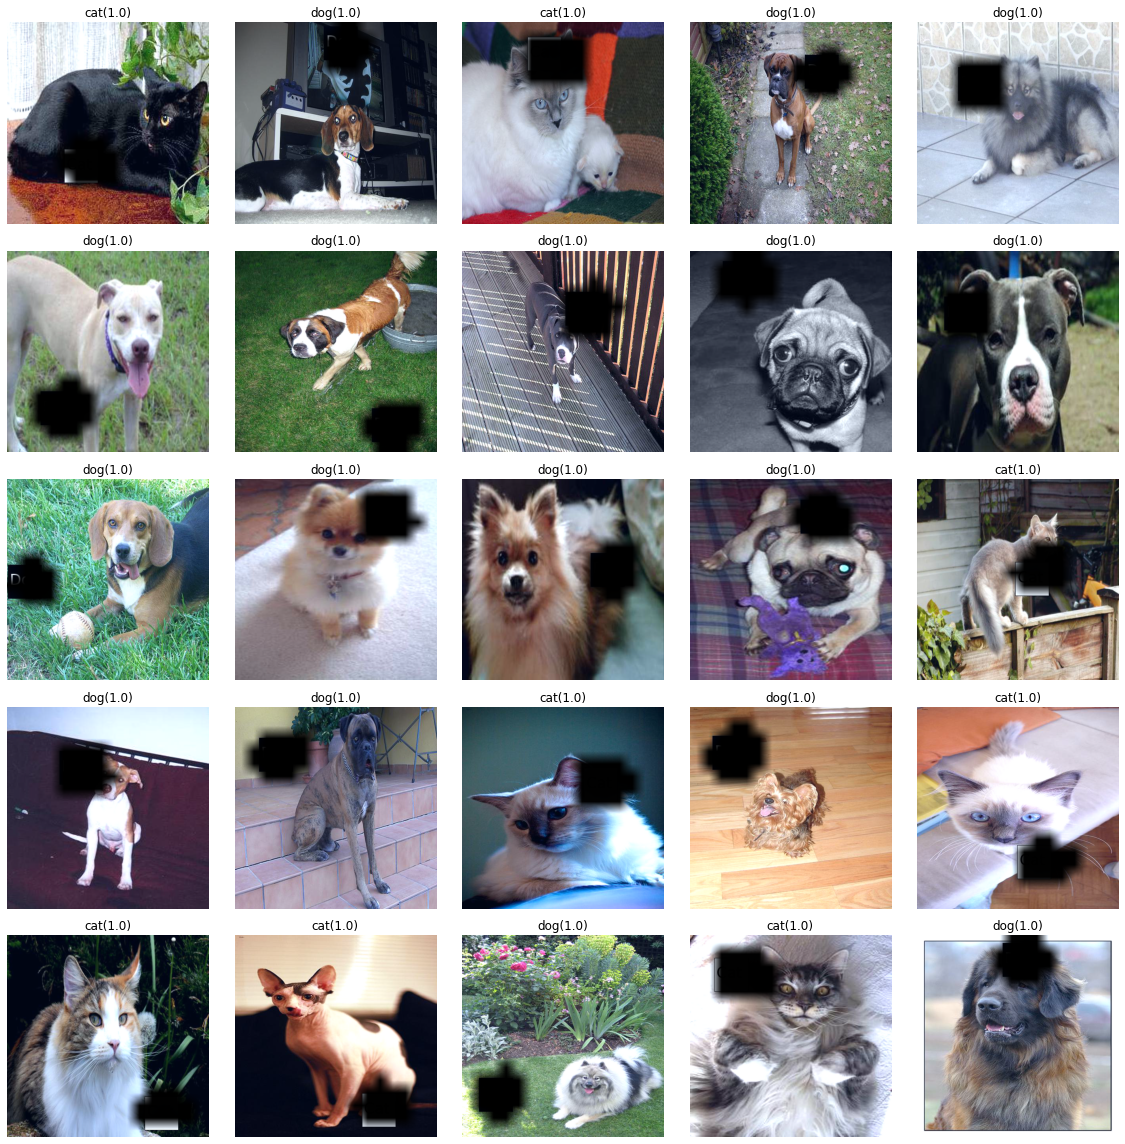

In [69]:
fig, ax = plt.subplots(5,5) 
k=0 
for i in range(5):
    for j in range(5): 
        x, = first(dls_r.test_dl([PILImage.create(get_image_files(path_r)[k])]))
        camimg = torch.einsum('ij,jkl -> ikl', net_2[2].weight, net_1(x).squeeze())
        a,b = net_r(x).tolist()[0]
        catprob, dogprob = np.exp(a)/ (np.exp(a)+np.exp(b)) ,  np.exp(b)/ (np.exp(a)+np.exp(b))
        ebayesthresh = importr('EbayesThresh').ebayesthresh
        power_threshed=np.array(ebayesthresh(FloatVector(torch.tensor(camimg[0].detach().reshape(-1))**2)))
        ybar_threshed = np.where(power_threshed>2000,torch.tensor(camimg[0].detach().reshape(-1)),0)
        power_threshed2=np.array(ebayesthresh(FloatVector(torch.tensor(camimg[1].detach().reshape(-1))**2)))
        ybar_threshed2 = np.where(power_threshed>2000,torch.tensor(camimg[1].detach().reshape(-1)),0)
        ybar_threshed = torch.tensor(ybar_threshed.reshape(16,16))
        ybar_threshed2 = torch.tensor(ybar_threshed2.reshape(16,16))
        if catprob>dogprob: 
            # test=camimg[0]-torch.min(camimg[0])
            A1=torch.exp(-0.1*ybar_threshed)
            X1=np.array(A1.to("cpu").detach(),dtype=np.float32)
            Y1=torch.Tensor(cv2.resize(X1,(512,512),interpolation=cv2.INTER_LINEAR))
            x1=x.squeeze().to('cpu')*Y1-torch.min(x.squeeze().to('cpu'))*Y1
            (x1*0.25).squeeze().show(ax=ax[i][j])
            ax[i][j].set_title("cat(%s)" % catprob.round(5))
        else: 
            # test=camimg[1]-torch.min(camimg[1])
            A1=torch.exp(-0.1*ybar_threshed2)
            X1=np.array(A1.to("cpu").detach(),dtype=np.float32)
            Y1=torch.Tensor(cv2.resize(X1,(512,512),interpolation=cv2.INTER_LINEAR))
            x1=x.squeeze().to('cpu')*Y1-torch.min(x.squeeze().to('cpu'))*Y1
            (x1*0.25).squeeze().show(ax=ax[i][j])
            ax[i][j].set_title("dog(%s)" % dogprob.round(5))
        k=k+1 
fig.set_figwidth(16)            
fig.set_figheight(16)
fig.tight_layout()

## ebayes X

In [64]:
# fig, ax = plt.subplots(5,5) 
# k=0 
# for i in range(5):
#     for j in range(5): 
#         x, = first(dls_r.test_dl([PILImage.create(get_image_files(path_r)[k])]))
#         camimg = torch.einsum('ij,jkl -> ikl', net_2[2].weight, net_1(x).squeeze())
#         a,b = net_r(x).tolist()[0]
#         catprob, dogprob = np.exp(a)/ (np.exp(a)+np.exp(b)) ,  np.exp(b)/ (np.exp(a)+np.exp(b))
#         if catprob>dogprob: 
#             test=camimg[0]-torch.min(camimg[0])
#             A1=torch.exp(-0.1*test)
#             X1=np.array(A1.to("cpu").detach(),dtype=np.float32)
#             Y1=torch.Tensor(cv2.resize(X1,(512,512),interpolation=cv2.INTER_LINEAR))
#             x1=x.squeeze().to('cpu')*Y1-torch.min(x.squeeze().to('cpu'))*Y1
#             (x1*0.25).squeeze().show(ax=ax[i][j])
#             ax[i][j].set_title("cat(%s)" % catprob.round(5))
#         else: 
#             test=camimg[1]-torch.min(camimg[1])
#             A1=torch.exp(-0.1*test)
#             X1=np.array(A1.to("cpu").detach(),dtype=np.float32)
#             Y1=torch.Tensor(cv2.resize(X1,(512,512),interpolation=cv2.INTER_LINEAR))
#             x1=x.squeeze().to('cpu')*Y1-torch.min(x.squeeze().to('cpu'))*Y1
#             (x1*0.25).squeeze().show(ax=ax[i][j])
#             ax[i][j].set_title("dog(%s)" % dogprob.round(5))
#         k=k+1 
# fig.set_figwidth(16)            
# fig.set_figheight(16)
# fig.tight_layout()

# 랜덤박스 detect 한 거 masking

In [ ]:
# os.mkdir("random_pet_mask1")

In [ ]:
# for i in range(len(path_r.ls())) :
#     name = str(list(path_r.ls())[i]).split('/')[-1]  #이름통일
#     x, = first(dls_r.test_dl([PILImage.create(get_image_files(path_r)[i])]))
#     camimg = torch.einsum('ij,jkl -> ikl', net_2[2].weight, net_1(x).squeeze())
#     a,b = net_r(x).tolist()[0]
#     catprob, dogprob = np.exp(a)/ (np.exp(a)+np.exp(b)) ,  np.exp(b)/ (np.exp(a)+np.exp(b))
#     ebayesthresh = importr('EbayesThresh').ebayesthresh
#     power_threshed=np.array(ebayesthresh(FloatVector(torch.tensor(camimg[0].detach().reshape(-1))**2)))
#     ybar_threshed = np.where(power_threshed>2000,torch.tensor(camimg[0].detach().reshape(-1)),0)
#     power_threshed2=np.array(ebayesthresh(FloatVector(torch.tensor(camimg[1].detach().reshape(-1))**2)))
#     ybar_threshed2 = np.where(power_threshed>2000,torch.tensor(camimg[1].detach().reshape(-1)),0)
#     ybar_threshed = torch.tensor(ybar_threshed.reshape(16,16))
#     ybar_threshed2 = torch.tensor(ybar_threshed2.reshape(16,16))        
#     if catprob>dogprob: 
#         # test=camimg[0]-torch.min(camimg[0])
#         A1=torch.exp(-0.1*ybar_threshed)
#         X1=np.array(A1.to("cpu").detach(),dtype=np.float32)
#         Y1=torch.Tensor(cv2.resize(X1,(512,512),interpolation=cv2.INTER_LINEAR))
#         x1=x.squeeze().to('cpu')*Y1-torch.min(x.squeeze().to('cpu')*Y1)
#         save_image((x1*0.25), "random_pet_mask1/"+name)
#     else: 
#         # test=camimg[1]-torch.min(camimg[1])
#         A1=torch.exp(-0.1*ybar_threshed2)
#         X1=np.array(A1.to("cpu").detach(),dtype=np.float32)
#         Y1=torch.Tensor(cv2.resize(X1,(512,512),interpolation=cv2.INTER_LINEAR))
#         x1=x.squeeze().to('cpu')*Y1-torch.min(x.squeeze().to('cpu')*Y1)
#         save_image((x1*0.25), "random_pet_mask1/"+name)

In [ ]:
# #저장 참고
# np_arr = np.array(tensor, dtype=np.uint8)
# img = PIL.Image.fromarray(np_arr)
# img.save('path')

In [ ]:
# name = str(list(path.ls())[1]).split('/')[-1]
# res1=(x1*0.35).squeeze()
# res1.show()
# save_image(res1, "pet3_mode1_res/"+name)
#res1.save("pet3_mode1_res/"+name)

# Second CAM

In [74]:
path_res1=Path('random_pet_mask1')

In [75]:
files_res1=get_image_files(path_res1)

In [76]:
dls_r1=ImageDataLoaders.from_name_func(path_res1,files_res1,label_func,item_tfms=Resize(512)) 

In [ ]:
# cat_acc_s = [] #고양이를 고양이라고 잘 맞춤
# dog_acc_s = [] #강아지를 고양이라고 맞춤
# cat_acc_f = [] #강아지를 강아지라고 잘 맞춤
# dog_acc_f = [] #고양이를 강아지라고 맞춤

# for i in range(len(path_res1.ls())) :
#     x, = first(dls_r1.test_dl([PILImage.create(get_image_files(path_res1)[i])]))
#     camimg = torch.einsum('ij,jkl -> ikl', net_2[2].weight, net_1(x).squeeze())
#     a,b = net_r(x).tolist()[0]
#     catprob, dogprob = np.exp(a)/ (np.exp(a)+np.exp(b)) ,  np.exp(b)/ (np.exp(a)+np.exp(b)) 
#     if catprob>dogprob: 
#         if label_func(str(list(path_res1.ls())[i]).split('/')[-1]) == 'cat' :
#             cat_acc_s.append(catprob.round(5))
#         else : 
#             cat_acc_f.append(catprob.round(5))
#     else:
#         if label_func(str(list(path_res1.ls())[i]).split('/')[-1]) == 'dog' :
#             dog_acc_s.append(dogprob.round(5))
#         else : 
#             dog_acc_f.append(dogprob.round(5))


기다리는 중  여기부터 다시 시행해보기

In [ ]:
print(len(cat_acc_s))
print(len(cat_acc_f))
print(len(dog_acc_s))
print(len(dog_acc_f))

In [ ]:
print(sum(cat_acc_s)/len(cat_acc_s) * 100)
# print(sum(cat_acc_f)/len(cat_acc_f) * 100)

print(sum(dog_acc_s)/len(dog_acc_s) * 100)
print(sum(dog_acc_f)/len(dog_acc_f) * 100)

In [ ]:
# dls_r1.show_batch(max_n=16)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

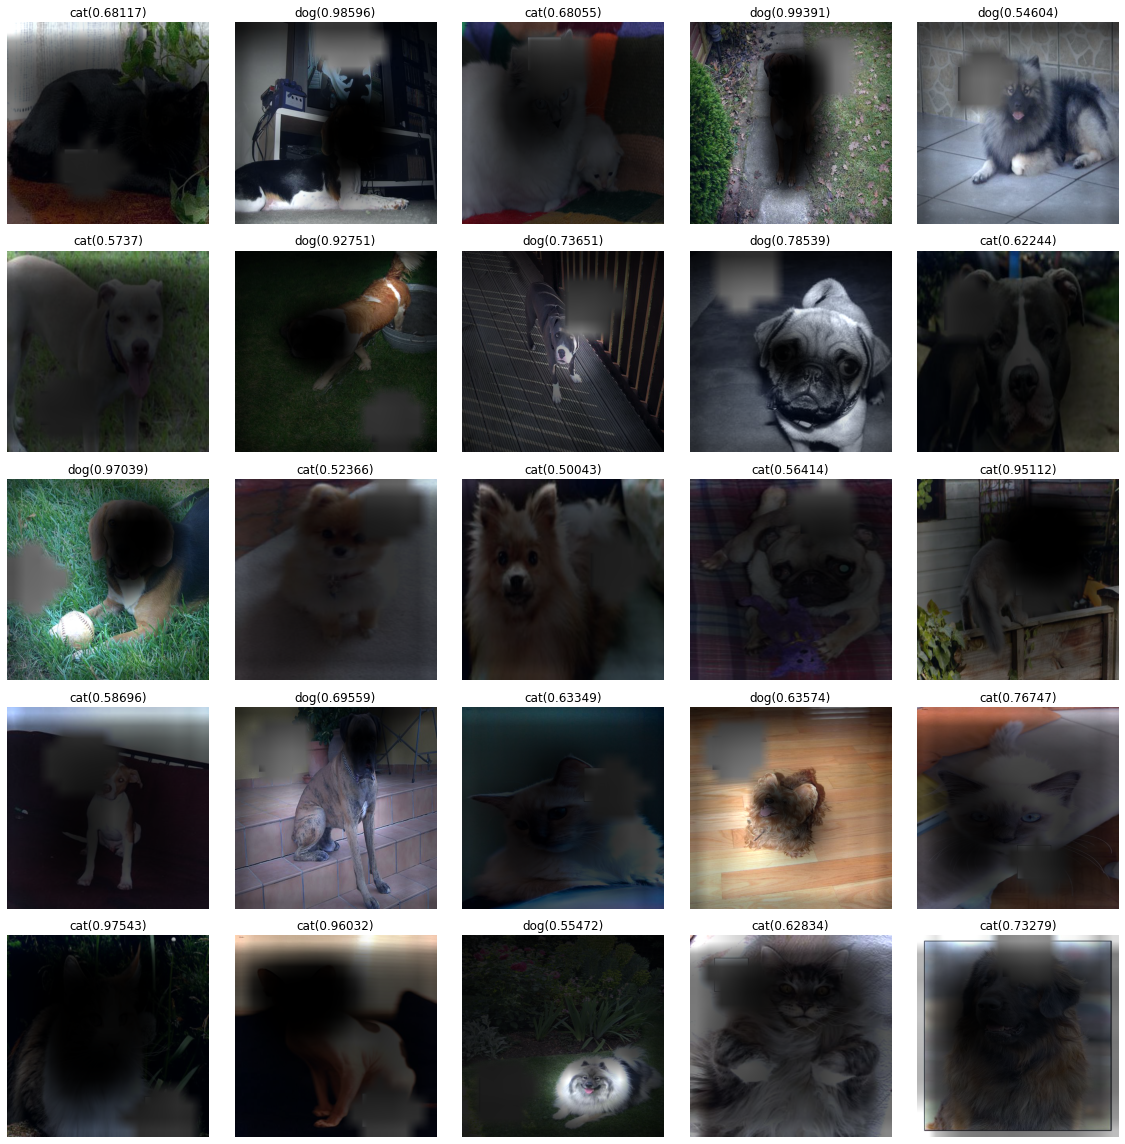

In [26]:
fig, ax = plt.subplots(5,5) 
k=0 
for i in range(5):
    for j in range(5): 
        x, = first(dls_r1.test_dl([PILImage.create(get_image_files(path_res1)[k])]))
        camimg = torch.einsum('ij,jkl -> ikl', net_2[2].weight, net_1(x).squeeze())
        a,b = net_r(x).tolist()[0]
        catprob, dogprob = np.exp(a)/ (np.exp(a)+np.exp(b)) ,  np.exp(b)/ (np.exp(a)+np.exp(b))
        if catprob>dogprob: 
            test=camimg[0]-torch.min(camimg[0])
            A1=torch.exp(-0.4*test)
            X1=np.array(A1.to("cpu").detach(),dtype=np.float32)
            Y1=torch.Tensor(cv2.resize(X1,(512,512),interpolation=cv2.INTER_LINEAR))
            x1=x.squeeze().to('cpu')*Y1-torch.min(x.squeeze().to('cpu')*Y1)
            (x1*1.2).squeeze().show(ax=ax[i][j])
            ax[i][j].set_title("cat(%s)" % catprob.round(5))
        else: 
            test=camimg[1]-torch.min(camimg[1])
            A1=torch.exp(-0.4*test)
            X1=np.array(A1.to("cpu").detach(),dtype=np.float32)
            Y1=torch.Tensor(cv2.resize(X1,(512,512),interpolation=cv2.INTER_LINEAR))
            x1=x.squeeze().to('cpu')*Y1-torch.min(x.squeeze().to('cpu')*Y1)
            (x1*1.2).squeeze().show(ax=ax[i][j])
            ax[i][j].set_title("dog(%s)" % dogprob.round(5))
        k=k+1 
fig.set_figwidth(16)            
fig.set_figheight(16)
fig.tight_layout()

In [77]:
# fig, ax = plt.subplots(5,5) 
# k=0 
# for i in range(5):
#     for j in range(5): 
#         x, = first(dls_r1.test_dl([PILImage.create(get_image_files(path_res1)[k])]))
#         camimg = torch.einsum('ij,jkl -> ikl', net_2[2].weight, net_1(x).squeeze())
#         a,b = net_r(x).tolist()[0]
#         catprob, dogprob = np.exp(a)/ (np.exp(a)+np.exp(b)) ,  np.exp(b)/ (np.exp(a)+np.exp(b)) 
#         if catprob>dogprob: 
#             dls_r1.train.decode((x,))[0].squeeze().show(ax=ax[i][j])
#             ax[i][j].imshow(camimg[0].to('cpu').detach(),alpha=0.3,extent=(0,512,512,0),interpolation='bilinear',cmap='bone')
#             ax[i][j].set_title("cat(%s)" % catprob.round(5))
#         else: 
#             dls_r1.train.decode((x,))[0].squeeze().show(ax=ax[i][j])
#             ax[i][j].imshow(camimg[1].to('cpu').detach(),alpha=0.3,extent=(0,512,512,0),interpolation='bilinear',cmap='bone')
#             ax[i][j].set_title("dog(%s)" % dogprob.round(5))
#         k=k+1 
# fig.set_figwidth(16)            
# fig.set_figheight(16)
# fig.tight_layout()

In [ ]:
# os.mkdir("random_pet_mask2")

In [ ]:
for i in range(len(path_res1.ls())) :
    name = str(list(path_res1.ls())[i]).split('/')[-1]  #이름통일
    x, = first(dls_r.test_dl([PILImage.create(get_image_files(path_res1)[i])]))  #pet3그림가져오기
    camimg = torch.einsum('ij,jkl -> ikl', net_2[2].weight, net_1(x).squeeze())   #CAM시각화
    a,b = net_r(x).tolist()[0]
    catprob, dogprob = np.exp(a)/ (np.exp(a)+np.exp(b)) ,  np.exp(b)/ (np.exp(a)+np.exp(b))
    if catprob>dogprob: 
        test=camimg[0]-torch.min(camimg[0])
        A1=torch.exp(-0.5*test)
        X1=np.array(A1.to("cpu").detach(),dtype=np.float32)
        Y1=torch.Tensor(cv2.resize(X1,(512,512),interpolation=cv2.INTER_LINEAR))
        x1=x.squeeze().to('cpu')*Y1-torch.min(x.squeeze().to('cpu')*Y1)
        save_image((x1*0.9), "random_pet_mask2/"+name)
    else: 
        test=camimg[1]-torch.min(camimg[1])
        A1=torch.exp(-0.5*test)
        X1=np.array(A1.to("cpu").detach(),dtype=np.float32)
        Y1=torch.Tensor(cv2.resize(X1,(512,512),interpolation=cv2.INTER_LINEAR))
        x1=x.squeeze().to('cpu')*Y1-torch.min(x.squeeze().to('cpu')*Y1)
        save_image((x10.95), "random_pet_mask2/"+name)

# Step by step

In [258]:
x, = first(dls_r.test_dl([PILImage.create(get_image_files(path_r)[2])]))

In [259]:
camimg = torch.einsum('ij,jkl -> ikl', net_2[2].weight, net_1(x).squeeze())

In [260]:
ebayesthresh = importr('EbayesThresh').ebayesthresh

power_threshed=np.array(ebayesthresh(FloatVector(torch.tensor(camimg[0].detach().reshape(-1))**2)))
ybar_threshed = np.where(power_threshed>2000,torch.tensor(camimg[0].detach().reshape(-1)),0)
ybar_threshed = torch.tensor(ybar_threshed.reshape(16,16))

power_threshed2=np.array(ebayesthresh(FloatVector(torch.tensor(camimg[1].detach().reshape(-1))**2)))
ybar_threshed2 = np.where(power_threshed2>1600,torch.tensor(camimg[1].detach().reshape(-1)),0)
ybar_threshed2 = torch.tensor(ybar_threshed2.reshape(16,16))

<ipython-input-260-17c991cf797e>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  power_threshed=np.array(ebayesthresh(FloatVector(torch.tensor(camimg[0].detach().reshape(-1))**2)))
<ipython-input-260-17c991cf797e>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ybar_threshed = np.where(power_threshed>2000,torch.tensor(camimg[0].detach().reshape(-1)),0)
<ipython-input-260-17c991cf797e>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  power_threshed2=np.array(ebayesthresh(FloatVector(torch.tensor(camimg[1].detach().reshape(-1))**2)))
<ipy

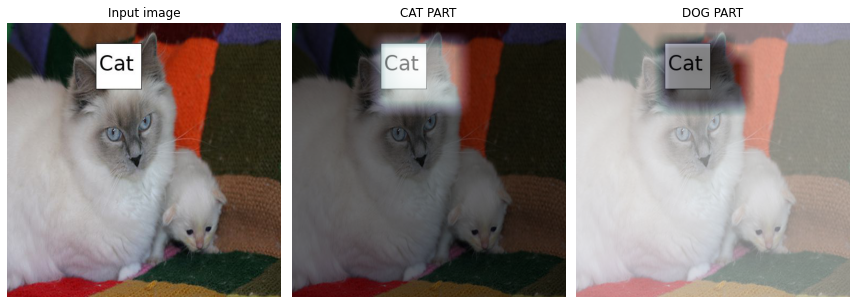

In [261]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3) 
# 
dls_r.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.set_title("Input image")
# 
dls_r.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow((ybar_threshed).to("cpu").detach(),alpha=0.5,extent=(0,511,511,0),interpolation='bilinear',cmap='bone')
ax2.set_title("CAT PART")
#
dls_r.train.decode((x,))[0].squeeze().show(ax=ax3)
ax3.imshow((ybar_threshed2).to("cpu").detach(),alpha=0.5,extent=(0,511,511,0),interpolation='bilinear',cmap='bone')
ax3.set_title("DOG PART")
#
fig.set_figwidth(12)            
fig.set_figheight(12)
fig.tight_layout()

In [262]:
a,b = net_r(x).tolist()[0]

In [263]:
np.exp(a)/ (np.exp(a)+np.exp(b)) ,  np.exp(b)/ (np.exp(a)+np.exp(b))

(0.9999999993947428, 6.052572469580072e-10)

In [264]:
# test=camimg_o[0]-torch.min(camimg_o[0])

In [265]:
T = camimg[0]

In [266]:
A1=torch.exp(-0.05*(ybar_threshed))

In [267]:
T1 = torch.exp(-0.05*T)

In [268]:
A2 = 1 - A1

In [269]:
T2 = 1 - T1

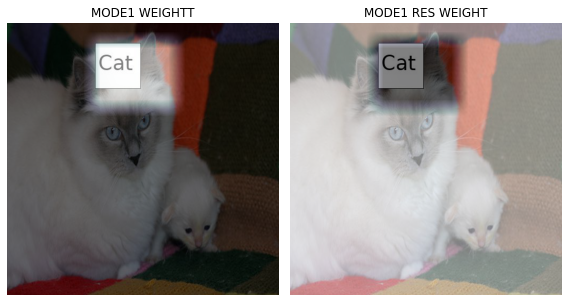

In [270]:
fig, (ax1,ax2) = plt.subplots(1,2) 
# 
dls_r.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.imshow(A2.data.to("cpu").detach(),alpha=0.5,extent=(0,511,511,0),interpolation='bilinear',cmap='bone')
ax1.set_title("MODE1 WEIGHTT")
#
dls_r.train.decode((x,))[0].squeeze().show(ax=ax2)
ax2.imshow(A1.data.to("cpu").detach(),alpha=0.5,extent=(0,511,511,0),interpolation='bilinear',cmap='bone')
ax2.set_title("MODE1 RES WEIGHT")
#
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

In [271]:
X1=np.array(A1.to("cpu").detach(),dtype=np.float32)

In [272]:
Y1=torch.Tensor(cv2.resize(X1,(512,512),interpolation=cv2.INTER_LINEAR))

In [273]:
x1=x.squeeze().to('cpu')*Y1-torch.min(x.squeeze().to('cpu'))*Y1

In [274]:
X12=np.array(A2.to("cpu").detach(),dtype=np.float32)

In [275]:
Y12=torch.Tensor(cv2.resize(X12,(512,512),interpolation=cv2.INTER_LINEAR))

In [276]:
x12=x.squeeze().to('cpu')*Y12-torch.min(x.squeeze().to('cpu'))*Y12

## 1st CAM 분리 결과

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


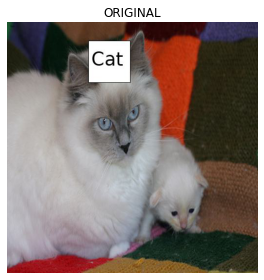

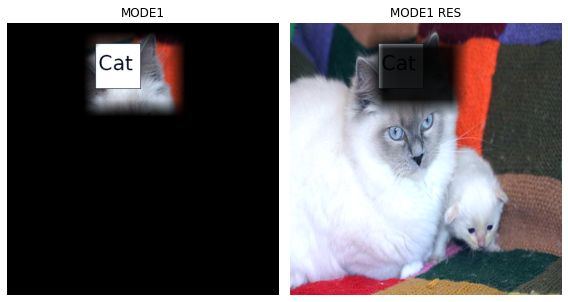

In [277]:
fig, (ax1) = plt.subplots(1,1) 
dls_r.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.set_title("ORIGINAL")
fig.set_figwidth(4)            
fig.set_figheight(4)
fig.tight_layout()
#
fig, (ax1, ax2) = plt.subplots(1,2) 
(x12*0.3).squeeze().show(ax=ax1)  #MODE1
(x1*0.3).squeeze().show(ax=ax2)  #MODE1_res
ax1.set_title("MODE1")
ax2.set_title("MODE1 RES")
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

In [278]:
x1 = x1.reshape(1,3,512,512)

In [279]:
camimg1 = torch.einsum('ij,jkl -> ikl', net_2[2].weight, net_1(x1*0.3).squeeze())

In [280]:
a1,b1 = net_r(x1).tolist()[0]

In [281]:
np.exp(a1)/ (np.exp(a1)+np.exp(b1)) ,  np.exp(b1)/ (np.exp(a1)+np.exp(b1))

(0.9986731335173454, 0.0013268664826546232)

## 2nd 결과

In [282]:
test1=camimg1[0]-torch.min(camimg1[0])

In [283]:
A3 = torch.exp(-0.05*(test1))

In [284]:
A4 = 1 - A3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


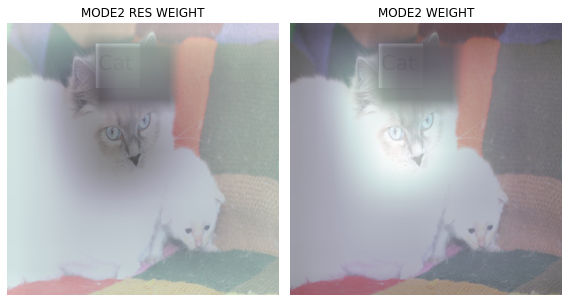

In [285]:
fig, (ax1,ax2) = plt.subplots(1,2) 
# 
x1.squeeze().show(ax=ax2)
dls_r.train.decode((x1,))[0].squeeze().show(ax=ax1)
ax1.imshow(A3.data.to("cpu").detach(),alpha=0.5,extent=(0,511,511,0),interpolation='bilinear',cmap='bone')
ax1.set_title("MODE2 RES WEIGHT")
#
x1.squeeze().show(ax=ax2)
dls_r.train.decode((x1,))[0].squeeze().show(ax=ax2)
ax2.imshow(A4.data.to("cpu").detach(),alpha=0.5,extent=(0,511,511,0),interpolation='bilinear',cmap='bone')
ax2.set_title("MODE2 WEIGHT")
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

In [321]:
X2=np.array(A3.to("cpu").detach(),dtype=np.float32)

In [322]:
Y2=torch.Tensor(cv2.resize(X2,(512,512),interpolation=cv2.INTER_LINEAR))

In [323]:
x2=(x1*0.3)*Y2-torch.min((x1*0.3)*Y2)

In [324]:
X22=np.array(A4.to("cpu").detach(),dtype=np.float32)

In [325]:
Y22=torch.Tensor(cv2.resize(X22,(512,512),interpolation=cv2.INTER_LINEAR))

In [326]:
x22=(x1*0.3)*Y22-torch.min((x1*0.3)*Y22)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


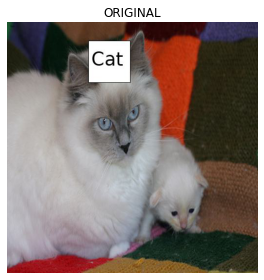

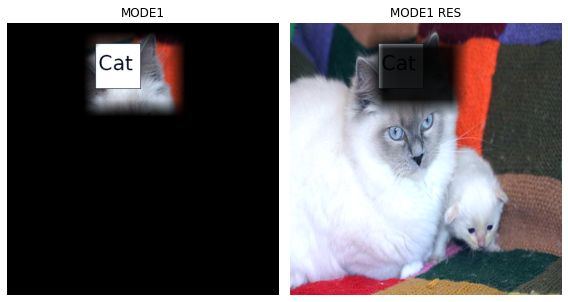

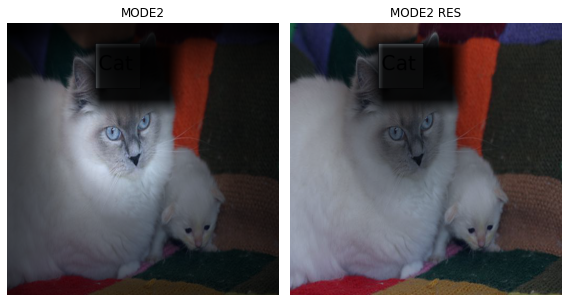

In [327]:
fig, (ax1) = plt.subplots(1,1) 
dls_r.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.set_title("ORIGINAL")
fig.set_figwidth(4)            
fig.set_figheight(4)
fig.tight_layout()
#
fig, (ax1, ax2) = plt.subplots(1,2) 
(x12*0.3).squeeze().show(ax=ax1)  #MODE1
(x1*0.3).squeeze().show(ax=ax2)  #MODE1_res
ax1.set_title("MODE1")
ax2.set_title("MODE1 RES")
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()
#
fig, (ax1, ax2) = plt.subplots(1,2) 
(x22*2).squeeze().show(ax=ax1)  #MODE2
(x2*0.7).squeeze().show(ax=ax2)  #MODE2_res
ax1.set_title("MODE2")
ax2.set_title("MODE2 RES")
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

In [328]:
x2 = x2.reshape(1,3,512,512)

In [329]:
camimg2 = torch.einsum('ij,jkl -> ikl', net_2[2].weight, net_1(x2*0.3).squeeze())

In [331]:
a2,b2 = net_r(x2).tolist()[0]
np.exp(a2)/(np.exp(a2)+np.exp(b2)), np.exp(b2)/(np.exp(a2)+np.exp(b2))

(0.6644029163711561, 0.33559708362884394)

# 3rd 결과

In [332]:
test2=camimg2[0]-torch.min(camimg2[0])

In [333]:
A5 = torch.exp(-0.05*(test2))

In [334]:
A6 = 1 - A5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


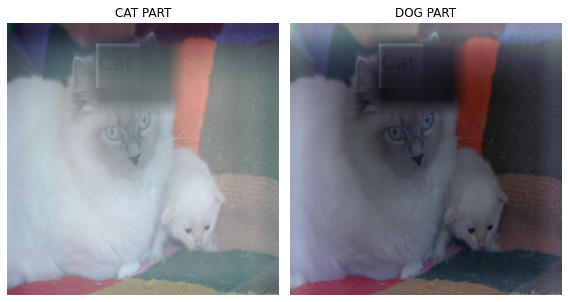

In [335]:
fig, (ax1, ax2) = plt.subplots(1,2) 
#
x2.squeeze().show(ax=ax1)
ax1.imshow(camimg2[0].to("cpu").detach(),alpha=0.5,extent=(0,511,511,0),interpolation='bilinear',cmap='bone')
ax1.set_title("CAT PART")
#
x2.squeeze().show(ax=ax2)
ax2.imshow(camimg2[1].to("cpu").detach(),alpha=0.5,extent=(0,511,511,0),interpolation='bilinear',cmap='bone')
ax2.set_title("DOG PART")
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()

In [336]:
X3=np.array(A5.to("cpu").detach(),dtype=np.float32)

In [337]:
Y3=torch.Tensor(cv2.resize(X3,(512,512),interpolation=cv2.INTER_LINEAR))

In [338]:
x3=(x2*0.3)*Y3-torch.min((x2*0.3)*Y3)

In [339]:
X33=np.array(A3.to("cpu").detach(),dtype=np.float32)

In [340]:
Y33=torch.Tensor(cv2.resize(X33,(512,512),interpolation=cv2.INTER_LINEAR))

In [341]:
x33=(x1*0.3)*Y33-torch.min((x1*0.3)*Y33)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


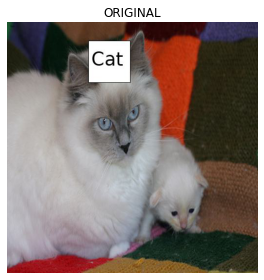

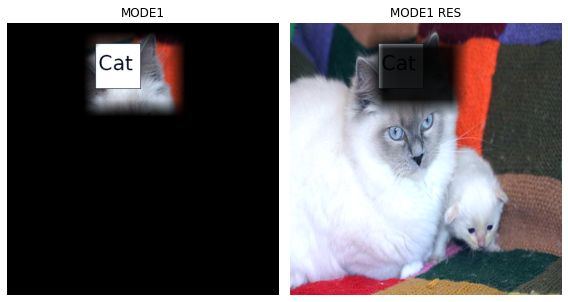

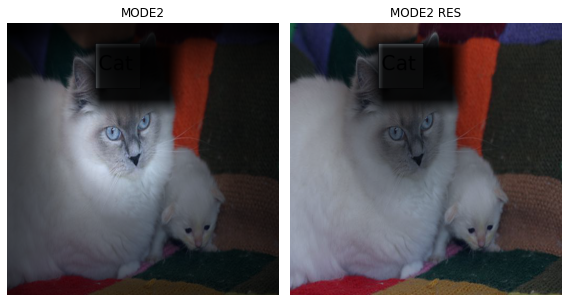

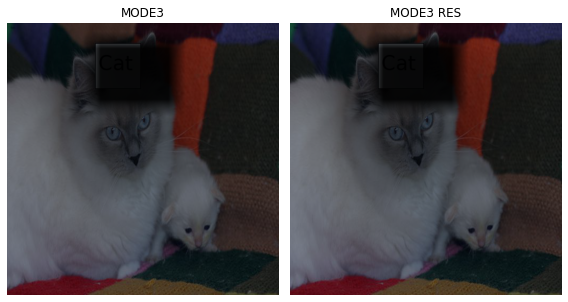

In [347]:
fig, (ax1) = plt.subplots(1,1) 
dls_r.train.decode((x,))[0].squeeze().show(ax=ax1)
ax1.set_title("ORIGINAL")
fig.set_figwidth(4)            
fig.set_figheight(4)
fig.tight_layout()
#
fig, (ax1, ax2) = plt.subplots(1,2) 
(x12*0.3).squeeze().show(ax=ax1)  #MODE1
(x1*0.3).squeeze().show(ax=ax2)  #MODE1_res
ax1.set_title("MODE1")
ax2.set_title("MODE1 RES")
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()
#
fig, (ax1, ax2) = plt.subplots(1,2) 
(x22*2).squeeze().show(ax=ax1)  #MODE2
(x2*0.7).squeeze().show(ax=ax2)  #MODE2_res
ax1.set_title("MODE2")
ax2.set_title("MODE2 RES")
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()
#
fig, (ax1, ax2) = plt.subplots(1,2) 
(x33*0.5).squeeze().show(ax=ax1)  #MODE2
(x3*2).squeeze().show(ax=ax2)  #MODE2_res
ax1.set_title("MODE3")
ax2.set_title("MODE3 RES")
fig.set_figwidth(8)            
fig.set_figheight(8)
fig.tight_layout()